# Pre-processing

In [16]:
import pandas as pd
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

#Style
sns.set_palette("deep", 8)


# Drop whats unecessary
data = data.drop(columns=['Cabin', 'Ticket'])
test_data = test_data.drop(columns=['Cabin', 'Ticket'])


# ----------------------
# Add feature FamilySize
# ----------------------
data['FamilySize'] = [x + y for x, y in zip(data['Parch'], data['SibSp'])]
test_data['FamilySize'] = [x + y for x, y in zip(test_data['Parch'], test_data['SibSp'])]


# Categorize
def family_size_category(size):
    if size >= 5: return 3
    elif 3 <= size < 5: return 2
    elif 1 <= size < 3: return 1
    else: return 0

data["FamilySize"] = data['FamilySize'].map(family_size_category)
test_data["FamilySize"] = test_data['FamilySize'].map(family_size_category)


# ---------------------
# Convert Sex to binary
# ---------------------
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)


# ------------------
# Deal with Embarked
# ------------------
# Fill Nan - Embarked
# Find most frequent category in column (mode()[0]) an fill NaN with it
embarked_freq = data['Embarked'].dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(embarked_freq)

# Convert to numeric
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)


# --------------------
# Get titles from Name
# --------------------
# Use .extract(REGEX) to extract titles only
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


for i, row in data.iterrows():
    if (row['Title'] not in ["Mr", "Miss", "Mrs", "Master"]):    
        data['Title'][i] = "Other"

for i, row in test_data.iterrows():
    if (row['Title'] not in ["Mr", "Miss", "Mrs", "Master"]):    
        test_data['Title'][i] = "Other"

# Convert to int 
data['Title'] = data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}).astype(int)
test_data['Title'] = test_data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}).astype(int)


# ---------------
# Fare Categories
# ---------------
# Fill missing fare on test data
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

# Apply categories with labels
data['FareCategory'] = pd.qcut(data['Fare'], 4, labels=[0,1,2,3]).astype(int)
test_data['FareCategory'] = pd.qcut(test_data['Fare'], 4, labels=[0,1,2,3]).astype(int)


# --------
# Clean up
# --------
# Save PassengerId for later
passenger_id = test_data['PassengerId']

# Drop whats unecessary
data = data.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Fare', 'Name'])
test_data = test_data.drop(columns=['SibSp', 'Parch', 'PassengerId', 'Fare', 'Name'])


# --------------------------------------------------------
# Deal with Age NaN and divide into categories (Train set)
# --------------------------------------------------------
#Replace NaN with mean for Age
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Select training data
XClean = data.dropna(axis=0, how='any')
X = XClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
y = data[['Age']].dropna()

# Select test data (rows missing Age) 
XTestClean = data.loc[pd.isnull(data[['Age']]).any(axis=1)]
XTest = XTestClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
yToFill = XTestClean[['Age']]

# Fit and predict
linreg = LinearRegression()
linreg.fit(X, y)

# predict
yPred = linreg.predict(XTest).flatten().tolist()

# Replace NaN with predicted Age values
yToFill['Age'] = yPred
data['Age'] = data.combine_first(yToFill)

# Categorize
def age_category(age):
    if age >= 60: return 4
    elif 21 <= age < 60: return 3
    elif 12 <= age < 21: return 2
    elif 3 <= age < 12: return 1
    else: return 0
    
data["Age"] = data['Age'].map(age_category)

# -------------------------------------------------------
# Deal with Age NaN and divide into categories (Test set)
# -------------------------------------------------------
# Select data (rows missing Age) 
XTestClean = test_data.loc[pd.isnull(test_data[['Age']]).any(axis=1)]
XTest = XTestClean[['Title', 'Pclass', 'FareCategory', 'Embarked']]
test_yToFill = XTestClean[['Age']]

# predict
yPred = linreg.predict(XTest).flatten().tolist()

# Replace NaN with predicted Age values
test_yToFill['Age'] = yPred
test_data['Age'] = test_data.combine_first(test_yToFill)

# Categorize
test_data["Age"] = test_data['Age'].map(age_category)

# ----------------------
data.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title,FareCategory
0,0,3,0,3,2,1,0,0
1,1,1,1,3,0,1,2,3
2,1,3,1,3,2,0,1,1
3,1,1,1,3,2,1,2,3
4,0,3,0,3,2,0,0,1


# Analysis

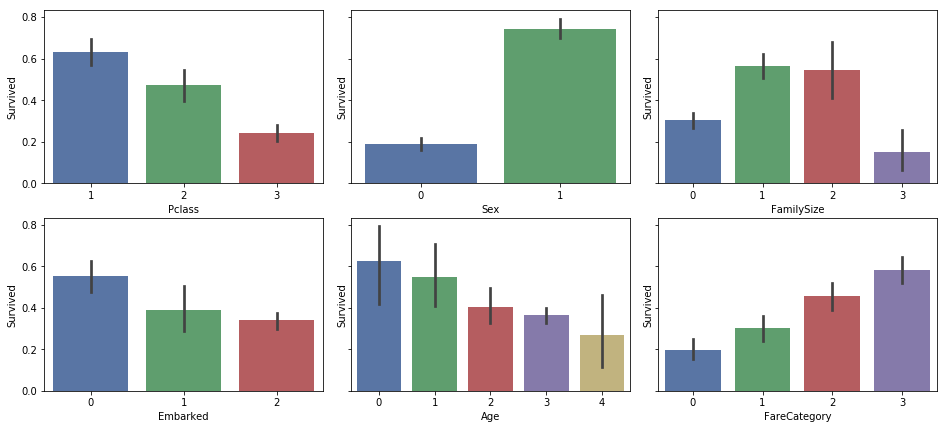

In [11]:
#Create figure & adjust
fig, (ax1, ax2) = plt.subplots(2, 3, gridspec_kw={'height_ratios':[1,1]}, figsize=(16,7), sharey=True)
fig.subplots_adjust(wspace=0.1)

#Plot
sns.barplot(x="Pclass", y="Survived", data=data, ax=ax1[0])
sns.barplot(x="Sex", y="Survived", data=data, ax=ax1[1])
sns.barplot(x="FamilySize", y="Survived", data=data, ax=ax1[2])
sns.barplot(x="Embarked", y="Survived", data=data, ax=ax2[0])
sns.barplot(x="Age", y="Survived", data=data, ax=ax2[1])
sns.barplot(x="FareCategory", y="Survived", data=data, ax=ax2[2])

# Random Forest

In [18]:
X = data[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Embarked', 'Title', 'Age']]
y = data['Survived']
X_test = test_data[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Embarked', 'Title', 'Age']]

In [164]:
# Create dummy variables for categorical variables and delete one to avoid trap
# -----------------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_d = pd.get_dummies(X, columns=['Embarked', 'Title'], drop_first=True)
X_test_d = pd.get_dummies(X_test, columns=['Embarked', 'Title'], drop_first=True)

In [87]:
# Feature Selection
# -----------------
from sklearn.feature_selection import RFECV
from collections import Counter
import operator

number = []
features = []
for x in range(50):
    clf_rf_4 = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200) 
    rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')
    rfecv = rfecv.fit(X_d, y)
    number.append(rfecv.n_features_)
    features.append(list(X_d.columns[rfecv.support_]))

print('Optimal number of features :', np.mean(number))

best_features = dict(Counter([item for sublist in features for item in sublist]))
print('Best features :', sorted(best_features.items(), key=operator.itemgetter(1)))

Optimal number of features : 9.34
Best features : [('Title_4', 4), ('Embarked_1', 13), ('Sex', 50), ('Pclass', 50), ('FamilySize', 50), ('FareCategory', 50), ('Age', 50), ('Embarked_2', 50), ('Title_1', 50), ('Title_2', 50), ('Title_3', 50)]


Feature ranking:
1. feature 5 (0.333685)
2. feature 0 (0.153776)
3. feature 1 (0.149487)
4. feature 3 (0.132735)
5. feature 2 (0.097504)
6. feature 6 (0.075875)
7. feature 4 (0.056937)


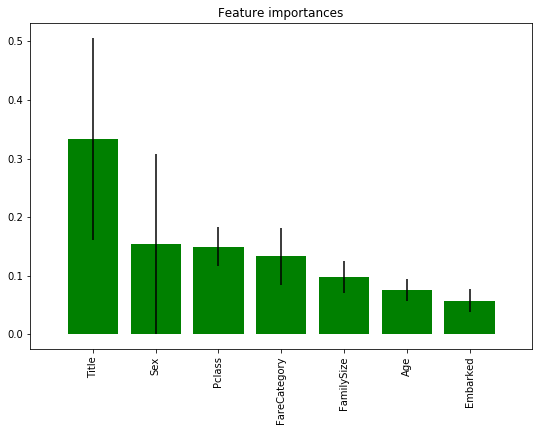

In [93]:
# Feature Importance
# -----------------
from sklearn.ensemble import RandomForestClassifier
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(9, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [165]:
X_dc = X_d[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Title_1', 'Title_2', 'Title_3', 'Age', 'Embarked_2']]
X_test_dc = X_test_d[['Sex', 'Pclass', 'FamilySize', 'FareCategory', 'Title_1', 'Title_2', 'Title_3', 'Age', 'Embarked_2']]

In [91]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)
score = cross_val_score(rfc, X_dc, y, cv=10, scoring='accuracy')
score.mean()

0.8294469980705935

In [99]:
from sklearn.grid_search import GridSearchCV
param_grid = {'bootstrap': [True],
               'max_depth': [3, 5, 7, 10, 20, None],
               'min_samples_leaf': [1, 2, 5, 20 , 50],
               'min_samples_split': [2, 3, 5, 10],
               'n_estimators': [5, 10, 20, 40, 80, 200]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=6)
grid_search = grid_search.fit(X_dc, y)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8305274971941639
{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [100]:
from sklearn.grid_search import GridSearchCV
param_grid = {'bootstrap': [True],
               'max_depth': [3, 5, 7, 10, 20, None],
               'min_samples_leaf': [1, 2, 5, 20 , 50],
               'min_samples_split': [2, 3, 5, 10],
               'n_estimators': [5, 10, 20, 40, 80, 200]}

grid_search1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=6)
grid_search1 = grid_search.fit(X_d, y)

print(grid_search1.best_score_)
print(grid_search1.best_params_)

0.8294051627384961
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 80}


In [203]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=80)
score = cross_val_score(rfc, X_dc, y, cv=5, scoring='accuracy')
score.mean()

0.8183148585336409

In [204]:
# Fit and Predict final model
rfc = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=80)
rfc.fit(X_dc, y)
y_pred = rfc.predict(X_test_dc)

In [205]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': passenger_id,
                                    'Survived': y_pred })
StackingSubmission.to_csv("Submission.csv", index=False)